# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [53]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(30)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [47]:
#seu código aqui
#Podemos fazer de duas maneiras mas eu optei por fazer com o info(), de acordo com o verificado no info os dados estão de acordo com as colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customerID          2500 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2500 non-null   int64  
 3   Casado              2500 non-null   object 
 4   Dependents          2500 non-null   object 
 5   Tempo_como_Cliente  2500 non-null   int64  
 6   PhoneService        1018 non-null   object 
 7   Servico_Internet    2500 non-null   object 
 8   Servico_Seguranca   2500 non-null   object 
 9   Suporte_Tecnico     2500 non-null   object 
 10  StreamingTV         2500 non-null   object 
 11  Tipo_Contrato       2500 non-null   object 
 12  PaymentMethod       2500 non-null   object 
 13  Pagamento_Mensal    2175 non-null   float64
 14  Total_Pago          2500 non-null   float64
 15  Churn               2495 non-null   object 
dtypes: flo

# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [48]:
#seu código aqui
#Verificando Dados nulos
df.isnull().sum()

customerID               0
Genero                  12
Idoso                    0
Casado                   0
Dependents               0
Tempo_como_Cliente       0
PhoneService          1482
Servico_Internet         0
Servico_Seguranca        0
Suporte_Tecnico          0
StreamingTV              0
Tipo_Contrato            0
PaymentMethod            0
Pagamento_Mensal       325
Total_Pago               0
Churn                    5
dtype: int64

In [49]:
#Verificando a porcentagem destes dados nulos
(df.isnull().sum() / len(df)) * 100

customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: float64

B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

In [50]:
#seu código aqui
#Excluindo as linhas das colunas pagamento mensal e genero por representarem apenas 0,48 dos dados totais
df.dropna(subset=['Genero','Idoso'], inplace=True)

In [52]:
#Verificando se os dados foram realmente excluidos
df[['Genero','Idoso']].isnull().sum()

Genero    0
Idoso     0
dtype: int64

C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

In [30]:
#seu código aqui
#Vamos analisar a distribuição do pagamento mensal
#Media
df['Pagamento_Mensal'].mean()

np.float64(65.60756321839081)

In [31]:
#Mediana
df['Pagamento_Mensal'].median()

71.45

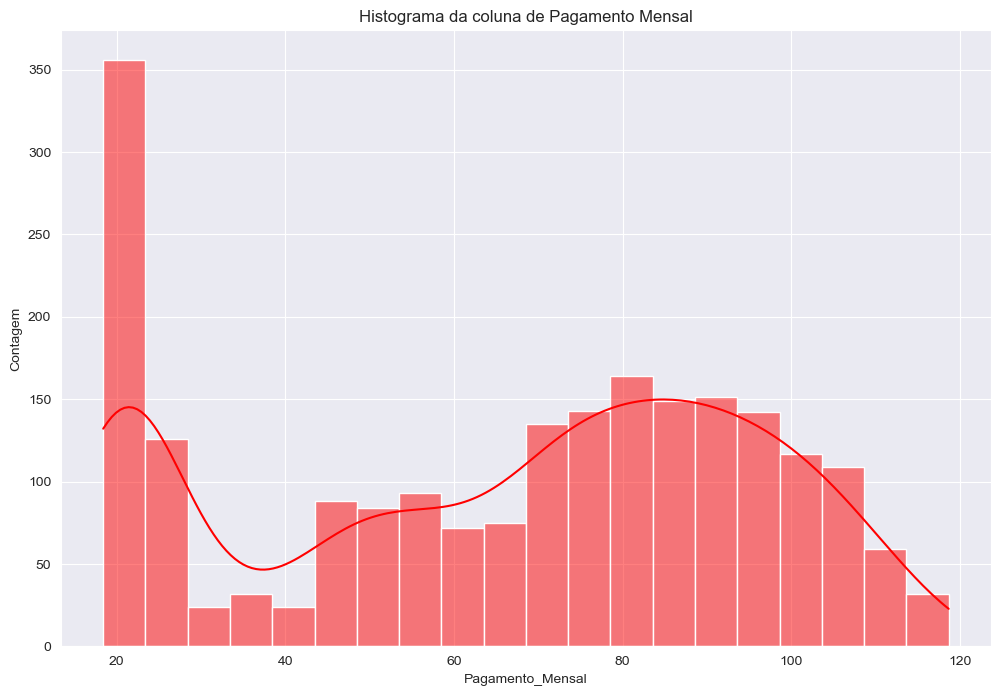

In [32]:
#Histograma do pagamento mensal
sns.set_style('darkgrid')

plt.figure(figsize=(12, 8))
sns.histplot(data = df, x='Pagamento_Mensal', bins=20, kde=True, color='red')
plt.title('Histograma da coluna de Pagamento Mensal')
plt.xlabel('Pagamento_Mensal')
plt.ylabel('Contagem')
plt.show()

In [33]:
#Feito isso vamos calcular uma nova mediana mais justa sem os outliers
pagamento_abaixo_20 = df[df['Pagamento_Mensal'] < 20]
pagamento_abaixo_20['Pagamento_Mensal'].median()

19.6

In [34]:
#Agora substituindo os valores
mediana_pagamento_abaixo_20 = df[df['Pagamento_Mensal'] < 20]['Pagamento_Mensal'].median()
#Preenche os nulos usando a atribuição direta para evitar avisos do Pandas
df['Pagamento_Mensal'] = df['Pagamento_Mensal'].fillna(mediana_pagamento_abaixo_20)
#Foi usada a mediana para pagamentos abaixo de 20 reais, assumimos a hipotese de que os dados faltantes representam um perfil mais básico ou perfil economico

# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [35]:
#seu código aqui
#Primeiro vamos verificar todas as colunas para saber como estão digitadas:
df.head(20)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),19.60,1840.75,No
16,8191-XWSZG,F,0,No,No,52,Yes,No,No internet service,No internet service,No internet service,One year,Mailed check,19.60,1022.95,No
17,9959-WOFKT,Male,0,No,Yes,71,Yes,Fiber optic,Yes,No,Yes,Two year,Bank transfer (automatic),19.60,7382.25,No
18,4190-MFLUW,F,0,Yes,Yes,10,Yes,DSL,No,Yes,No,Month-to-month,Credit card (automatic),19.60,528.35,Yes
19,4183-MYFRB,F,0,No,No,21,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,19.60,1862.90,No
20,8779-QRDMV,Male,1,No,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,19.60,39.65,Yes
21,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No internet service,No internet service,No internet service,One year,Bank transfer (automatic),19.60,202.25,No


In [39]:
#Primeiro deixando tudo em letra maiuscula e substituindo os valores necessários:
df['Genero'] = df['Genero'].str.upper()
df['sevico_Internet'] = df['Servico_Internet'].str.upper
# A função replace também aceita dicionarios facilitando assim o código
df['Genero'] = df['Genero'].replace({'M':'MASCULINO','F':'FEMININO','MALE':'MASCULINO','FEMALE':'FEMININO'})

In [40]:
#Exibindo as modificações
df.head()

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn,sevico_Internet
0,7590-VHVEG,FEMININO,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No,<bound method StringMethods.upper of <pandas.c...
1,5575-GNVDE,MASCULINO,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No,<bound method StringMethods.upper of <pandas.c...
2,3668-QPYBK,MASCULINO,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes,<bound method StringMethods.upper of <pandas.c...
3,7795-CFOCW,MASCULINO,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),19.60,1840.75,No,<bound method StringMethods.upper of <pandas.c...
16,8191-XWSZG,FEMININO,0,No,No,52,Yes,No,No internet service,No internet service,No internet service,One year,Mailed check,19.60,1022.95,No,<bound method StringMethods.upper of <pandas.c...


# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixando em português, ou inglês.

In [43]:
#Renomeando colunas para manter um padrão
df = df.rename(columns={'Dependents':'Dependentes','PhoneService':'Servico_Telefonico','sevico_Internet':'Servico_Internet','PaymentMethod':'Metodo_Pagamento'})
                   
df.columns

Index(['customerID', 'Genero', 'Idoso', 'Casado', 'Dependentes',
       'Tempo_como_Cliente', 'Serviço_Telefonico', 'Servico_Internet',
       'Servico_Seguranca', 'Suporte_Tecnico', 'StreamingTV', 'Tipo_Contrato',
       'Metodo_Pagamento', 'Pagamento_Mensal', 'Total_Pago', 'Churn',
       'Servico_Internet'],
      dtype='object')

In [21]:
df.to_csv('CHURN_TELECON_MOD08_TAREFA_V2.csv', index=False)